In [381]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import pandas as pd
import re
import plotly.express as px

In [2]:
url = "https://www.imovirtual.com/comprar/lisboa/"
response = requests.get(url)
response

<Response [200]>

In [3]:
soup = BeautifulSoup(response.content)
#soup.prettify

In [4]:
list_of_site_pages = []
url = 'https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72'
for number in range(2,168):
    list_of_site_pages.append(url+'&page='+str(number))
list_of_site_pages.insert(0,url)
#list_of_site_pages

In [5]:
URLs = []
prices = []
house_type = []
area = []
locations = []
conditions = []
valid_conditions = ['Usado', 'Renovado', 'Novo','Em construção']

for page in list_of_site_pages:
    print(page)
    response = requests.get(page)
    soup = BeautifulSoup(response.content)

    # returns list of all articles/houses in the current page
    # had to use regex because the class name is different for each article
    listings = soup.find_all(attrs = {'class' : re.compile('(offer-item ad_id)')})

    URLs.append([house.a['href'] for house in listings])
    prices.append([house.find_all(attrs = {'class' : 'offer-item-price'})[0].text.replace(" ","").replace(",","").split("\n")[1].replace("€","") for house in listings])
    house_type.append([house.find_all(attrs = {'class': 'offer-item-rooms hidden-xs'})[0].text for house in listings])
    area.append([float(house.find_all(attrs = {'class': 'hidden-xs offer-item-area'})[0].text.replace(" m²","").replace(",",".").replace(" ","")) for house in listings])
    locations.append([house.find_all(attrs = {'class': 'text-nowrap'})[1].text.split(" ")[-2].replace(",","") for house in listings])
    
    # the condition of the house can be found in two distinct classes, some properties have one type of formatting, others another
    # had to use a try, except to handle both cases
#    i = 0
    for listing in listings:
#        url = listing.a['href']
        try:
            table = listing.find_all(attrs = {'class' : 'parameters-view hidden-xs'})[0]
            condition = [line.text for line in table.find_all('li')][-1]    
            if condition in valid_conditions:
                conditions.append(condition)
#                print(f'Listing {i}, condition: {condition}, {url}')
#                i += 1
            else:
                conditions.append(None)
#                print(f'Listing {i}, condition: {None}, {url}')
#                i += 1
        except:
            try:
                table = listing.find_all(attrs = {'class' : 'params-small clearfix hidden-xs'})[0]
                condition = [line.text for line in table.find_all('li')][-2]
                if condition in valid_conditions:
                    conditions.append(condition)
#                    print(f'Listing {i}, condition: {condition}, {url}')
#                    i += 1
                else:
                    conditions.append(None)
#                    print(f'Listing {i}, condition: {None}, {url}')
#                    i += 1            
            except:
                conditions.append(None)
#                print(f'Listing {i}, condition: {None}, {url}')
#                i += 1


https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=2
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=3
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=4
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=5
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=6
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=7
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&sea

https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=63
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=64
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=65
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=66
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=67
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=68
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=69
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregio

https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=125
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=126
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=127
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=128
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=129
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=130
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%5Bregion_id%5D=11&search%5Bsubregion_id%5D=153&nrAdsPerPage=72&page=131
https://www.imovirtual.com/comprar/apartamento/lisboa/?search%

In [293]:
master = pd.DataFrame()
master['location'] = [item for lister in locations for item in lister]
master['price'] = [item for lister in prices for item in lister]
master['tier'] = [item for lister in house_type for item in lister]
master['size'] = [item for lister in area for item in lister]
master['link'] = [item for lister in URLs for item in lister]
master['condition'] = conditions

try:
    master.to_csv('master.csv',encoding='utf-8-sig')
    print('Master table saved.')
except:
    print('Master failed to save.')

Master table saved.


In [294]:
# removes entries without price
master = master[~(master["price"].str.startswith("P")|master["price"].str.startswith("S"))]
#master = master[~master["size"].str.startswith("P",'S')]

In [295]:
master.head(50)

,location,price,tier,size,link,condition
0,Lumiar,359000,T4,118.00,https://www.imovirtual.com/anuncio/lumiar-cent...,Usado
1,Lumiar,458500,T2,120.00,https://www.imovirtual.com/anuncio/apartamento...,Usado
2,Nações,409000,T2,85.00,https://www.imovirtual.com/anuncio/parque-naco...,Usado
3,Belém,1680000,T3,159.60,https://www.imovirtual.com/anuncio/t3-belem-li...,Em construção
4,Estrela,315000,T1,62.00,https://www.imovirtual.com/anuncio/apartamento...,Renovado
5,Alvalade,495000,T2,69.00,https://www.imovirtual.com/anuncio/apartamento...,Renovado
6,António,215000,T1,36.00,https://www.imovirtual.com/anuncio/t1-santa-ma...,Renovado
7,Ajuda,315000,T2,60.00,https://www.imovirtual.com/anuncio/apartamento...,Renovado
8,Misericórdia,290000,T2,52.00,https://www.imovirtual.com/anuncio/t2-renovado...,Usado
9,Belém,325000,T1,51.00,https://www.imovirtual.com/anuncio/apartamento...,Novo


In [296]:
master['tier'] = master['tier'].str.replace('T10 ou superior','T10')

In [297]:
master[master["price"].str.startswith('P')|master["price"].str.startswith("S")]
#master[master["size"].str.startswith("P",'S')]

,location,price,tier,size,link,condition


In [298]:
master.isnull().sum()

location        0
price           0
tier            0
size            0
link            0
condition    1387
dtype: int64

In [299]:
master.head()

,location,price,tier,size,link,condition
0,Lumiar,359000,T4,118.0,https://www.imovirtual.com/anuncio/lumiar-cent...,Usado
1,Lumiar,458500,T2,120.0,https://www.imovirtual.com/anuncio/apartamento...,Usado
2,Nações,409000,T2,85.0,https://www.imovirtual.com/anuncio/parque-naco...,Usado
3,Belém,1680000,T3,159.6,https://www.imovirtual.com/anuncio/t3-belem-li...,Em construção
4,Estrela,315000,T1,62.0,https://www.imovirtual.com/anuncio/apartamento...,Renovado


In [300]:
master[master['link'] == 'https://www.imovirtual.com/anuncio/apartamento-t4-novo-de-luxo-em-lisboa-ID1485p.html#b64e3d84cd']

,location,price,tier,size,link,condition


In [301]:
master[master['size'] < 10].shape
master

,location,price,tier,size,link,condition
0,Lumiar,359000,T4,118.0,https://www.imovirtual.com/anuncio/lumiar-cent...,Usado
1,Lumiar,458500,T2,120.0,https://www.imovirtual.com/anuncio/apartamento...,Usado
2,Nações,409000,T2,85.0,https://www.imovirtual.com/anuncio/parque-naco...,Usado
3,Belém,1680000,T3,159.6,https://www.imovirtual.com/anuncio/t3-belem-li...,Em construção
4,Estrela,315000,T1,62.0,https://www.imovirtual.com/anuncio/apartamento...,Renovado
...,...,...,...,...,...,...
12019,Belém,895000,T5,120.0,https://www.imovirtual.com/anuncio/apartamento...,Usado
12020,Nações,560000,T1,64.0,https://www.imovirtual.com/anuncio/apartamento...,Novo
12021,Nações,1030000,T4,161.0,https://www.imovirtual.com/anuncio/apartamento...,Novo
12022,Maior,195000,T1,45.0,https://www.imovirtual.com/anuncio/apartamento...,Usado


In [302]:
#master['size'].hist()
#sns.boxplot(x = master['price/area'])

In [303]:
master.shape

(11841, 6)

In [304]:
# Change the type of price 
master = master.astype({"price": float})

# calculate average price 
master['price/area'] = master['price']/master['size']

In [305]:
master = master[~(master['size'] <10)]
master = master[~(master['size'] >1900)]
master = master[~(master['price/area'] >80000)]

In [307]:
#master['tier'].replace('')

In [308]:
master.sort_values(by = 'price/area', ascending = False)['link'][0]

'https://www.imovirtual.com/anuncio/lumiar-centro-t4-duplex-junto-ao-metro-e-parque-da-quin-ID14riV.html#4c4eb7ed2b'

In [309]:
#mytable = master.groupby(['location','condition','price/area','size','tier']).size()
#mytable
master.dropna(inplace = True)

In [310]:
bin_names = ['xx_small','x_small','small','medium','large','x_large','xx_large','xxx_large']
master
master['size_bins'] = pd.cut(master['size'],8,labels = bin_names)

In [311]:

#master['size'].min()
#master['size'].max()

In [312]:
master
grouped = master.groupby(['location','tier']).agg({"price/area":'mean'}).reset_index()
grouped = grouped.sort_values(by = ['price/area'], axis = 0, ascending = False)
grouped.tail(50)

,location,tier,price/area
101,França,T1,4199.659092
102,França,T2,4166.001700
77,Campolide,T6,4125.000000
66,Benfica,T3,4068.094961
156,Novas,T8,4062.928554
178,Vicente,T6,4062.500000
48,Arroios,T8,4057.971014
149,Novas,T10,4048.756940
87,Clara,T4,4026.713836
159,Olivais,T2,3970.506638


In [313]:
new_df = pd.merge(grouped, master, how='inner', left_on=['location','tier'], right_on = ['location','tier'])
new_df.head(60)
#new_df = pd.merge(grouped, master, how='inner')
#new_df.shape

#new_df.head(400)

#new_df.drop_duplicates(subset = ['location','size_bins','price','size','condition','tier','price/area','average_price/area'],inplace = True)

,location,tier,price/area_x,price,size,link,condition,price/area_y,size_bins
0,Alcântara,T6,18027.210884,7950000.0,441.00,https://www.imovirtual.com/anuncio/lisboa-prom...,Em construção,18027.210884,large
1,Misericórdia,T7,17986.425339,7950000.0,442.00,https://www.imovirtual.com/anuncio/apartamento...,Novo,17986.425339,large
2,Misericórdia,T5,14557.663912,2900000.0,270.00,https://www.imovirtual.com/anuncio/apartamento...,Renovado,10740.740741,small
3,Misericórdia,T5,14557.663912,770000.0,159.00,https://www.imovirtual.com/anuncio/apartamento...,Renovado,4842.767296,x_small
4,Misericórdia,T5,14557.663912,2650000.0,259.00,https://www.imovirtual.com/anuncio/apartamento...,Usado,10231.660232,small
5,Misericórdia,T5,14557.663912,2630000.0,325.00,https://www.imovirtual.com/anuncio/magnifico-a...,Renovado,8092.307692,small
6,Misericórdia,T5,14557.663912,5850000.0,281.95,https://www.imovirtual.com/anuncio/penthouse-t...,Em construção,20748.359638,small
7,Misericórdia,T5,14557.663912,2250000.0,165.00,https://www.imovirtual.com/anuncio/fantastico-...,Usado,13636.363636,x_small
8,Misericórdia,T5,14557.663912,5850000.0,286.15,https://www.imovirtual.com/anuncio/apartamento...,Em construção,20443.823170,small
9,Misericórdia,T5,14557.663912,5850000.0,281.95,https://www.imovirtual.com/anuncio/t5-luxo-pen...,Em construção,20748.359638,small


In [314]:
#master = master.reset_index(drop = True)
#grouped = grouped.reset_index(drop = True)

In [315]:
#def row_adder(row):
#    for row in master:
#        for row in grouped:
#            if (master['location'] == grouped['location']) and (master['tier'] == grouped['tier']):
#                return grouped['price/area']
#master['price/area_average'] = master.apply(row_adder, axis = 1)

In [364]:
new_df.shape

(10367, 9)

In [365]:
useful_df = new_df[['link','location','size_bins','condition','price','size','tier','price/area_x','price/area_y']]

In [366]:
useful_df.rename(columns = {'price/area_x':'average_price/area','price/area_y':'price/area'}, inplace = True)
useful_df.head()

,link,location,size_bins,condition,price,size,tier,average_price/area,price/area
0,https://www.imovirtual.com/anuncio/lisboa-promenade-t6-ID11rz0.html#08077a4fe7,Alcântara,large,Em construção,7950000.0,441.0,T6,18027.210884,18027.210884
1,https://www.imovirtual.com/anuncio/apartamento-penthouse-t6-na-avenida-24-de-julho-the-promenade-ID14qMI.html#194425d59a,Misericórdia,large,Novo,7950000.0,442.0,T7,17986.425339,17986.425339
2,https://www.imovirtual.com/anuncio/apartamento-t4-1-no-chiado-com-vista-rio-e-frescos-do-sec-ID14rm1.html#4c4eb7ed2b,Misericórdia,small,Renovado,2900000.0,270.0,T5,14557.663912,10740.740741
3,https://www.imovirtual.com/anuncio/apartamento-t4-1-com-patio-no-principe-real-lisboa-ID14bt8.html#1aa3f9fdd1,Misericórdia,x_small,Renovado,770000.0,159.0,T5,14557.663912,4842.767296
4,https://www.imovirtual.com/anuncio/apartamento-t5-com-terraco-e-vista-rio-chiado-ID14b8b.html#1aa3f9fdd1,Misericórdia,small,Usado,2650000.0,259.0,T5,14557.663912,10231.660232


In [367]:
useful_df['profitability'] = (useful_df['average_price/area']-useful_df['price/area'])*useful_df['size']
useful_df = useful_df.sort_values(by = ['profitability'],ascending = False)
useful_df.head()


,link,location,size_bins,condition,price,size,tier,average_price/area,price/area,profitability
30,https://www.imovirtual.com/anuncio/apart-t6-condominio-c-piscina-IDZ9Nu.html#6323dd430c,Estrela,xxx_large,Usado,3610000.0,754.0,T6,11651.377372,4787.798408,5.175139e+06
20,https://www.imovirtual.com/anuncio/apartamento-em-lisboa-com-vista-sobre-o-tejo-ID13hSB.html#b1f351d174,Misericórdia,large,Usado,1800000.0,454.0,T6,13728.164155,3964.757709,4.432587e+06
50,https://www.imovirtual.com/anuncio/empreendimento-buenos-aires-palace-ID14mKy.html#b70de804ec,Estrela,xx_large,Novo,3258000.0,688.0,T5,9942.359373,4735.465116,3.582343e+06
55,https://www.imovirtual.com/anuncio/apartamento-t5-em-condominio-privado-na-lapa-lisboa-ID11uHl.html#abc82a9500,Estrela,xx_large,Novo,3429500.0,688.0,T5,9942.359373,4984.738372,3.410843e+06
1264,https://www.imovirtual.com/anuncio/vende-se-espaco-amplo-no-principe-real-centro-de-lisboa-ID13SZH.html#a8fd585efe,António,large,Em construção,700000.0,477.0,T2,7406.184583,1467.505241,2.832750e+06


In [368]:
useful_df.shape

(10367, 10)

In [369]:
useful_df.drop_duplicates(subset = ['location','size_bins','price','size','condition','tier','price/area','average_price/area'],inplace = True)

In [370]:
useful_df['profitability'] = (useful_df['average_price/area']-useful_df['price/area'])*useful_df['size']
useful_df = useful_df.sort_values(by = ['profitability'],ascending = False)
pd.set_option('display.max_colwidth', None)
useful_df.head()

,link,location,size_bins,condition,price,size,tier,average_price/area,price/area,profitability
30,https://www.imovirtual.com/anuncio/apart-t6-condominio-c-piscina-IDZ9Nu.html#6323dd430c,Estrela,xxx_large,Usado,3610000.0,754.0,T6,11651.377372,4787.798408,5.175139e+06
20,https://www.imovirtual.com/anuncio/apartamento-em-lisboa-com-vista-sobre-o-tejo-ID13hSB.html#b1f351d174,Misericórdia,large,Usado,1800000.0,454.0,T6,13728.164155,3964.757709,4.432587e+06
50,https://www.imovirtual.com/anuncio/empreendimento-buenos-aires-palace-ID14mKy.html#b70de804ec,Estrela,xx_large,Novo,3258000.0,688.0,T5,9942.359373,4735.465116,3.582343e+06
55,https://www.imovirtual.com/anuncio/apartamento-t5-em-condominio-privado-na-lapa-lisboa-ID11uHl.html#abc82a9500,Estrela,xx_large,Novo,3429500.0,688.0,T5,9942.359373,4984.738372,3.410843e+06
1264,https://www.imovirtual.com/anuncio/vende-se-espaco-amplo-no-principe-real-centro-de-lisboa-ID13SZH.html#a8fd585efe,António,large,Em construção,700000.0,477.0,T2,7406.184583,1467.505241,2.832750e+06


In [371]:
valid_locations = [item for item in useful_df['location']]

valid_locations1 = []
for item in valid_locations:
    if item not in valid_locations1:
        valid_locations1.append(item)

In [372]:
sizes = (master['size'].max()-master['size'].min())/8
for i in range(8):
    print(master['size'].min()+sizes*i)

15.0
120.25
225.5
330.75
436.0
541.25
646.5
751.75


In [373]:
dict_of_size = {'xx_small':(15,120),
               'x_small':(120,225),
               'small':(225,330),
               'medium':(330,436),
               'large':(436,541),
               'x_large':(541,646),
               'xx_large':(646,751),
               'xxx_large':(751,857)}
def house_searcher():
    
    x = input('By which category would you like to search? Please enter one of the following: (location, size bins, size range, price range, tier, condition)').lower()
    
    if x == 'location':
        while True:           
            l = input(f'Please enter the Province in Lisbon you would like to view. please type one of the following:{valid_locations1}').capitalize()   # Get the input
            if l in valid_locations:      
                return useful_df[useful_df['location'] == l].head(10)
    elif x == 'size bins':
        while True:             
            s = input(f'Please enter what size of house you would like to view from the selection: {dict_of_size}')
            if s in bin_names:    
                return useful_df[useful_df['size_bins'] == s.lower() ].head(10)
    elif x == 'size range':
        while True:
            r = input('Please enter the house size range you would like to search in the form: min_size-max_size ')
            if r != '':
                return useful_df[(float((r.split('-')[0]))<useful_df['size'])&(useful_df['size']<float(r.split('-')[1]))].head(10)
    elif x == 'condition':
        while True:            
            c = input(f'Please enter what condition house you are looking for from the options (Usado, Renovado, Novo, Em construção)').capitalize()   # Get the input
            if c in valid_conditions:    
                return useful_df[useful_df['condition'] == c].head(10)
    elif x == 'price range':
        while True:
            p = input('Please enter the price range you would like to search in the form: min_price-max_price ')
            if p != '':
                return useful_df[(float((p.split('-')[0]))<useful_df['price'])&(useful_df['price']<float(p.split('-')[1]))].head(10)
    elif x == 'tier':
        while True:             
            t = input('Please enter the tier number from 1-10')
            if t in ['0','1','2','3','4','5','6','7','8','9','10']:      
                return useful_df[useful_df['tier'] == ('T' + t)].head(10)
    else:
        print("I didn't get that, can you please double check your input")
        searcher()

In [397]:
house_searcher()

By which category would you like to search? Please enter one of the following: (location, size bins, size range, price range, tier, condition)condition
Please enter what condition house you are looking for from the options (Usado, Renovado, Novo, Em construção)usado


,link,location,size_bins,condition,price,size,tier,average_price/area,price/area,profitability
30,https://www.imovirtual.com/anuncio/apart-t6-condominio-c-piscina-IDZ9Nu.html#6323dd430c,Estrela,xxx_large,Usado,3610000.0,754.0,T6,11651.377372,4787.798408,5.175139e+06
20,https://www.imovirtual.com/anuncio/apartamento-em-lisboa-com-vista-sobre-o-tejo-ID13hSB.html#b1f351d174,Misericórdia,large,Usado,1800000.0,454.0,T6,13728.164155,3964.757709,4.432587e+06
23,https://www.imovirtual.com/anuncio/chiado-apartamento-t6-com-vista-de-cidade-e-de-rio-ID145lt.html#fe004761d5,Misericórdia,small,Usado,1200000.0,250.0,T6,13728.164155,4800.000000,2.232041e+06
1387,https://www.imovirtual.com/anuncio/penthouse-duplex-t3-1-terracos-vista-rio-parque-d-IDZCJV.html#c45ee54b72,Nações,large,Usado,1600000.0,506.0,T3,7275.023204,3162.055336,2.081162e+06
631,https://www.imovirtual.com/anuncio/apartamento-t5-de-luxo-no-centro-de-lisboa-perto-do-hotel-IDPpt8.html#8d596ebb90,Campolide,large,Usado,1980000.0,480.0,T5,8235.387127,4125.000000,1.972986e+06
51,https://www.imovirtual.com/anuncio/apartamento-t5-condominio-buenos-aires-palace-lapa-ID131NF.html#b4833cbf40,Estrela,x_large,Usado,3610000.0,560.0,T5,9942.359373,6446.428571,1.957721e+06
45,https://www.imovirtual.com/anuncio/apartamento-na-lapa-com-295-m2-ID12Dfy.html#c6dc45dd3b,Estrela,small,Usado,1350000.0,295.0,T5,9942.359373,4576.271186,1.582996e+06
42,https://www.imovirtual.com/anuncio/t5-na-estrela-com-garagem-terraco-e-fantastica-vista-IDLFFW.html#3cb4c17d6f,Estrela,small,Usado,1400000.0,288.0,T5,9942.359373,4861.111111,1.463399e+06
37,https://www.imovirtual.com/anuncio/apartamento-t5-com-estacionamento-para-venda-em-lisboa-IDVmWN.html#0d5d8e1b41,Estrela,medium,Usado,1950000.0,335.0,T5,9942.359373,5820.895522,1.380690e+06
67,https://www.imovirtual.com/anuncio/apartamento-t4-com-vista-rio-IDZhgp.html#6323dd430c,Misericórdia,small,Usado,1300000.0,270.0,T4,9750.808552,4814.814815,1.332718e+06


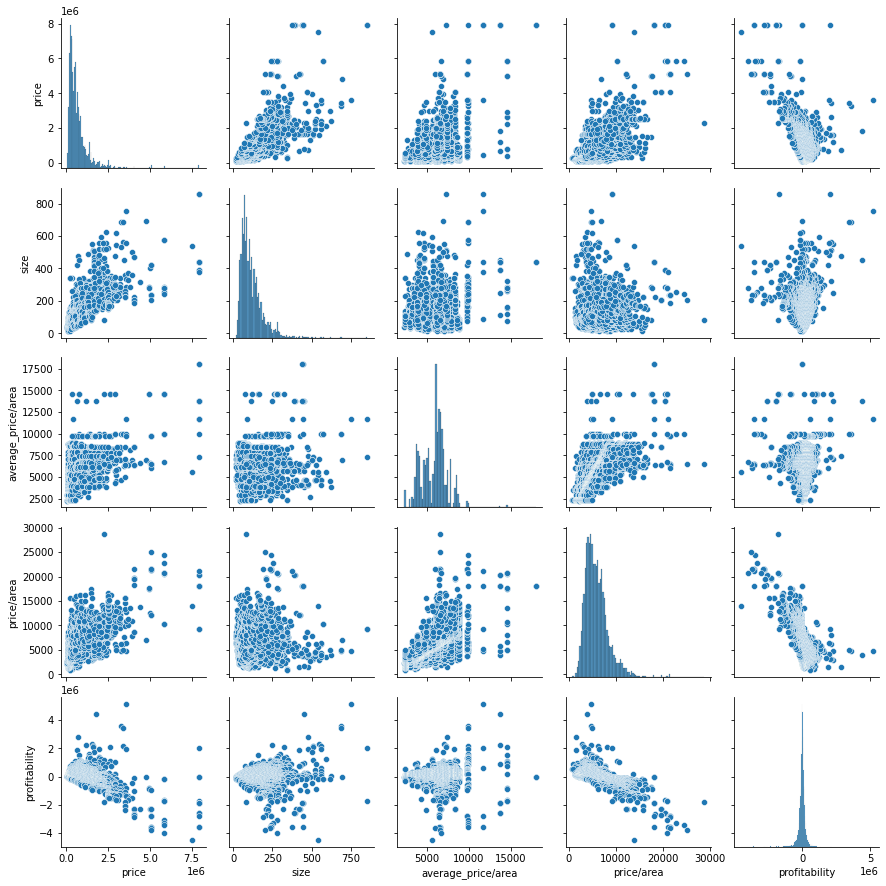

In [376]:
sns.pairplot(useful_df)

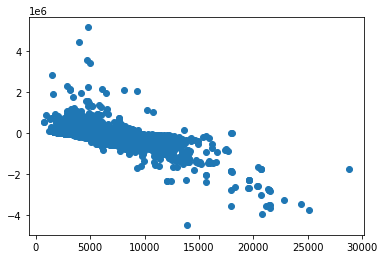

In [379]:
plt.scatter(useful_df['price/area'],useful_df['profitability'])

In [382]:
pd.options.plotting.backend = "plotly"

In [391]:
useful_df.plot.scatter('price/area','profitability')

In [392]:
useful_df.plot.scatter('price','profitability')

In [385]:
useful_df[(useful_df['price/area']<5000)&(useful_df['profitability']>3000000)]

,link,location,size_bins,condition,price,size,tier,average_price/area,price/area,profitability
30,https://www.imovirtual.com/anuncio/apart-t6-condominio-c-piscina-IDZ9Nu.html#6323dd430c,Estrela,xxx_large,Usado,3610000.0,754.0,T6,11651.377372,4787.798408,5.175139e+06
20,https://www.imovirtual.com/anuncio/apartamento-em-lisboa-com-vista-sobre-o-tejo-ID13hSB.html#b1f351d174,Misericórdia,large,Usado,1800000.0,454.0,T6,13728.164155,3964.757709,4.432587e+06
50,https://www.imovirtual.com/anuncio/empreendimento-buenos-aires-palace-ID14mKy.html#b70de804ec,Estrela,xx_large,Novo,3258000.0,688.0,T5,9942.359373,4735.465116,3.582343e+06
55,https://www.imovirtual.com/anuncio/apartamento-t5-em-condominio-privado-na-lapa-lisboa-ID11uHl.html#abc82a9500,Estrela,xx_large,Novo,3429500.0,688.0,T5,9942.359373,4984.738372,3.410843e+06


In [388]:
useful_df[(useful_df['profitability']>4000000)]

,link,location,size_bins,condition,price,size,tier,average_price/area,price/area,profitability
30,https://www.imovirtual.com/anuncio/apart-t6-condominio-c-piscina-IDZ9Nu.html#6323dd430c,Estrela,xxx_large,Usado,3610000.0,754.0,T6,11651.377372,4787.798408,5.175139e+06
20,https://www.imovirtual.com/anuncio/apartamento-em-lisboa-com-vista-sobre-o-tejo-ID13hSB.html#b1f351d174,Misericórdia,large,Usado,1800000.0,454.0,T6,13728.164155,3964.757709,4.432587e+06


In [389]:
useful_df[(useful_df['size_bins'] == 'xxx_large')&(useful_df['location']=='Estrela')]

,link,location,size_bins,condition,price,size,tier,average_price/area,price/area,profitability
30,https://www.imovirtual.com/anuncio/apart-t6-condominio-c-piscina-IDZ9Nu.html#6323dd430c,Estrela,xxx_large,Usado,3610000.0,754.0,T6,11651.377372,4787.798408,5.175139e+06
28,https://www.imovirtual.com/anuncio/apartamento-novo-de-luxo-com-6-quartos-junto-ao-rio-tejo-ID11EtV.html#c14d267e98,Estrela,xxx_large,Novo,7950000.0,857.0,T6,11651.377372,9276.546091,2.035230e+06
1339,https://www.imovirtual.com/anuncio/apartamento-857-m-t7-ID13YN8.html#3c24d7fb13,Estrela,xxx_large,Novo,7950000.0,857.0,T7,7278.024598,9276.546091,-1.712733e+06


In [387]:
useful_df[(useful_df['size_bins'] == 'large')&(useful_df['location']=='Misericórdia')]

,link,location,size_bins,condition,price,size,tier,average_price/area,price/area,profitability
20,https://www.imovirtual.com/anuncio/apartamento-em-lisboa-com-vista-sobre-o-tejo-ID13hSB.html#b1f351d174,Misericórdia,large,Usado,1800000.0,454.00,T6,13728.164155,3964.757709,4.432587e+06
1,https://www.imovirtual.com/anuncio/apartamento-penthouse-t6-na-avenida-24-de-julho-the-promenade-ID14qMI.html#194425d59a,Misericórdia,large,Novo,7950000.0,442.00,T7,17986.425339,17986.425339,0.000000e+00
483,https://www.imovirtual.com/anuncio/t3-penthouse-c-terraco-piscina-privativos-e-vista-rio-l-ID12XFq.html#34de7d07c2,Misericórdia,large,Novo,4045000.0,470.00,T3,8403.754377,8606.382979,-9.523544e+04
24,https://www.imovirtual.com/anuncio/excelente-penthouse-com-6-suites-com-terraco-e-piscina-pr-ID12HFY.html#d5cdc1823d,Misericórdia,large,Novo,7950000.0,442.00,T6,13728.164155,17986.425339,-1.882151e+06
19,https://www.imovirtual.com/anuncio/penthouse-t6-misericordia-ID10vnL.html#d4e941cfe5,Misericórdia,large,Em construção,7950000.0,441.85,T6,13728.164155,17992.531402,-1.884211e+06
21,https://www.imovirtual.com/anuncio/penthouse-t6-em-lisboa-ID13bck.html#b1f351d174,Misericórdia,large,Novo,7950000.0,441.85,T6,13728.164155,17992.531402,-1.884211e+06
26,https://www.imovirtual.com/anuncio/t6-luxo-penthouse-em-edificio-prime-lisboa-ID13u1q.html#769cc5d81f,Misericórdia,large,Em construção,7950000.0,441.00,T6,13728.164155,18027.210884,-1.895880e+06


In [398]:
house_searcher()

By which category would you like to search? Please enter one of the following: (location, size bins, size range, price range, tier, condition)price range
Please enter the price range you would like to search in the form: min_price-max_price 100000-150000


,link,location,size_bins,condition,price,size,tier,average_price/area,price/area,profitability
215,https://www.imovirtual.com/anuncio/apartamento-t1-perto-da-universidade-lusiadas-ajuda-ID13Vrz.html#47a7931261,Belém,xx_small,Usado,148000.0,49.0,T1,8788.941856,3020.408163,282658.150952
5884,https://www.imovirtual.com/anuncio/t1-campo-de-ourique-52-m2-r-arco-do-carvalhao-4-andar-2-elevadores-ID13JZk.html#fa19cc93a2,Ourique,xx_small,Usado,119900.0,52.0,T1,5980.599590,2305.769231,191091.178704
5877,https://www.imovirtual.com/anuncio/apartamento-t1-campo-de-ourique-ID14gh9.html#b70de804ec,Ourique,xx_small,Usado,120000.0,52.0,T1,5980.599590,2307.692308,190991.178704
9903,https://www.imovirtual.com/anuncio/casas-apartamento-t2-1-para-venda-na-damaia-de-cima-ID121MZ.html#5bda4c13c0,Carnide,xx_small,Usado,125000.0,87.0,T3,3504.468685,1436.781609,179888.775602
209,https://www.imovirtual.com/anuncio/apartamento-t1-largo-da-paz-ajuda-ID13Ece.html#c15e1b27d4,Belém,xx_small,Renovado,132500.0,34.0,T1,8788.941856,3897.058824,166324.023109
9923,https://www.imovirtual.com/anuncio/apartamento-t3-amadora-ID11VNh.html#9db7d44923,Carnide,xx_small,Usado,133000.0,84.0,T3,3504.468685,1583.333333,161375.369547
5520,https://www.imovirtual.com/anuncio/t2-duplex-bairro-casalinho-da-ajuda-ID13Ilt.html#ad90e00bfd,Belém,xx_small,Usado,139500.0,50.0,T2,6012.738465,2790.000000,161136.923232
1683,https://www.imovirtual.com/anuncio/estudio-remodelado-junto-ao-campo-martires-mobilado-e-eq-ID14rm2.html#311ec1777a,Maior,xx_small,Usado,129000.0,41.0,T0,7035.280423,3146.341463,159446.497354
6683,https://www.imovirtual.com/anuncio/apartamento-t2-alvito-ID13FyR.html#f32fc0524a,Alcântara,xx_small,Usado,145000.0,56.0,T2,5411.682634,2589.285714,158054.227497
1118,https://www.imovirtual.com/anuncio/no-coracao-do-bairro-alto-ID12Lir.html#afee281fd2,Misericórdia,xx_small,Renovado,145000.0,40.0,T0,7484.093838,3625.000000,154363.753500
